In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotnine as p9
from datetime import datetime
import seaborn as sns

In [33]:
df = pd.read_csv('F:/BaiduSyncdisk/Shengyou-Casual/S 数据分析/Chrun Analysis/useractive0710.csv')

In [34]:
#第一步 清洗数据#

# 删除 ActiveRegion 或 Country 字段等于 "China" 或 "Shanghai" 的数据
# 使用 ~ 符号代表逻辑非操作，& 代表逻辑与操作，| 代表逻辑或操作
mask = ~((df['ActiveRegion'] == 'China') | (df['ActiveRegion'] == 'Shanghai') |
          (df['Region'] == 'China') | (df['Region'] == 'Shanghai'))

# 使用布尔索引来筛选出不满足条件的行
df = df.loc[mask]

# 删除 AccCreateTime 和 CreateTime 至少一列有空值的行
df = df.dropna(subset=['AccCreateTime', 'CreateTime'])

print(df.head())  # 打印前5行数据



   AccCreateTime ActiveRegion         City                   CreateDate  \
0  1,720,090,102  Philippines  Iloilo City  Jul 10, 2024 @ 14:12:24.000   
1  1,720,506,504  Philippines       Daraga  Jul 10, 2024 @ 13:39:08.000   
2  1,720,525,027  Philippines  Quezon City  Jul 10, 2024 @ 13:16:48.000   
3  1,720,588,563  Philippines       Manila  Jul 10, 2024 @ 13:16:03.000   
4  1,720,586,298  Philippines   San Miguel  Jul 10, 2024 @ 12:38:18.000   

      CreateTime  CurrentLevel                              DeviceID  \
0  1,720,591,944            11  47cbca37-7320-3bde-9b0c-b3baa0f375a7   
1  1,720,589,948             9  6a0db678-d90f-37b2-a97b-6c3249bfe2ca   
2  1,720,588,608             2  46ba04a0-1cc6-3497-b52f-1bd02aa06ffe   
3  1,720,588,563             1  c95d94dc-67ec-3316-9f55-ca787cdbe09d   
4  1,720,586,298             1  06298034-d9e5-344b-b0a2-966f286387ef   

         Event  IsFirstTime Net  ...  R60  R7  R90       Region  ResVersion  \
0  user_active            0   0  ... 

In [35]:
# 将带有逗号分隔符的字段转化为纯数值字段
df['AccCreateTime'] = df['AccCreateTime'].str.replace(',', '').astype(int)
df['CreateTime'] = df['CreateTime'].str.replace(',', '').astype(int)

# 确保 'CreateTime' 和 'AccCreateTime' 列是 datetime 类型
df['CreateTime'] = pd.to_datetime(df['CreateTime'], unit='s')
df['AccCreateTime'] = pd.to_datetime(df['AccCreateTime'], unit='s')

# 步骤1：计算 LifeTime
df['LifeTime'] = (df['CreateTime'] - df['AccCreateTime']).dt.days

# 查看清洗后的数据
print(df.head())  # 打印前5行数据
print(df.info())  # 获取数据集的信息，包括每列的数据类型、非空值数量等

        AccCreateTime ActiveRegion         City                   CreateDate  \
0 2024-07-04 10:48:22  Philippines  Iloilo City  Jul 10, 2024 @ 14:12:24.000   
1 2024-07-09 06:28:24  Philippines       Daraga  Jul 10, 2024 @ 13:39:08.000   
2 2024-07-09 11:37:07  Philippines  Quezon City  Jul 10, 2024 @ 13:16:48.000   
3 2024-07-10 05:16:03  Philippines       Manila  Jul 10, 2024 @ 13:16:03.000   
4 2024-07-10 04:38:18  Philippines   San Miguel  Jul 10, 2024 @ 12:38:18.000   

           CreateTime  CurrentLevel                              DeviceID  \
0 2024-07-10 06:12:24            11  47cbca37-7320-3bde-9b0c-b3baa0f375a7   
1 2024-07-10 05:39:08             9  6a0db678-d90f-37b2-a97b-6c3249bfe2ca   
2 2024-07-10 05:16:48             2  46ba04a0-1cc6-3497-b52f-1bd02aa06ffe   
3 2024-07-10 05:16:03             1  c95d94dc-67ec-3316-9f55-ca787cdbe09d   
4 2024-07-10 04:38:18             1  06298034-d9e5-344b-b0a2-966f286387ef   

         Event  IsFirstTime Net  ...  R7  R90       Regi

In [36]:
# 步骤1：筛选每个 DeviceID 中 CreateTime 最晚的记录
latest_createtime = df.groupby('DeviceID')['CreateTime'].transform('max')
df_selected = df[df['CreateTime'] == latest_createtime]

print(df_selected.info())
print(df_selected.head())


<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1658
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AccCreateTime  1300 non-null   datetime64[ns]
 1   ActiveRegion   1300 non-null   object        
 2   City           1186 non-null   object        
 3   CreateDate     1300 non-null   object        
 4   CreateTime     1300 non-null   datetime64[ns]
 5   CurrentLevel   1300 non-null   int64         
 6   DeviceID       1300 non-null   object        
 7   Event          1300 non-null   object        
 8   IsFirstTime    1300 non-null   int64         
 9   Net            1300 non-null   object        
 10  Platform       1300 non-null   int64         
 11  R1             1300 non-null   int64         
 12  R14            1300 non-null   int64         
 13  R180           1300 non-null   int64         
 14  R2             1300 non-null   int64         
 15  R30            1300 non-nu

In [37]:
# 绘制流失3天以上玩家的关卡分布

# 计算CreateTime距今的天数差异
df_selected['DaysAgo'] = (datetime.now() - df_selected['CreateTime']).dt.days

# 筛选出距今3天以上的记录
df_filtered = df_selected[df_selected['DaysAgo'] > 2]
df_filtered = df_selected[df_selected['LifeTime'] > 0]
print(df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 0 to 1516
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AccCreateTime  114 non-null    datetime64[ns]
 1   ActiveRegion   114 non-null    object        
 2   City           113 non-null    object        
 3   CreateDate     114 non-null    object        
 4   CreateTime     114 non-null    datetime64[ns]
 5   CurrentLevel   114 non-null    int64         
 6   DeviceID       114 non-null    object        
 7   Event          114 non-null    object        
 8   IsFirstTime    114 non-null    int64         
 9   Net            114 non-null    object        
 10  Platform       114 non-null    int64         
 11  R1             114 non-null    int64         
 12  R14            114 non-null    int64         
 13  R180           114 non-null    int64         
 14  R2             114 non-null    int64         
 15  R30            114 non-null

C:\Users\admin\AppData\Local\Temp\ipykernel_2236\1869327420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


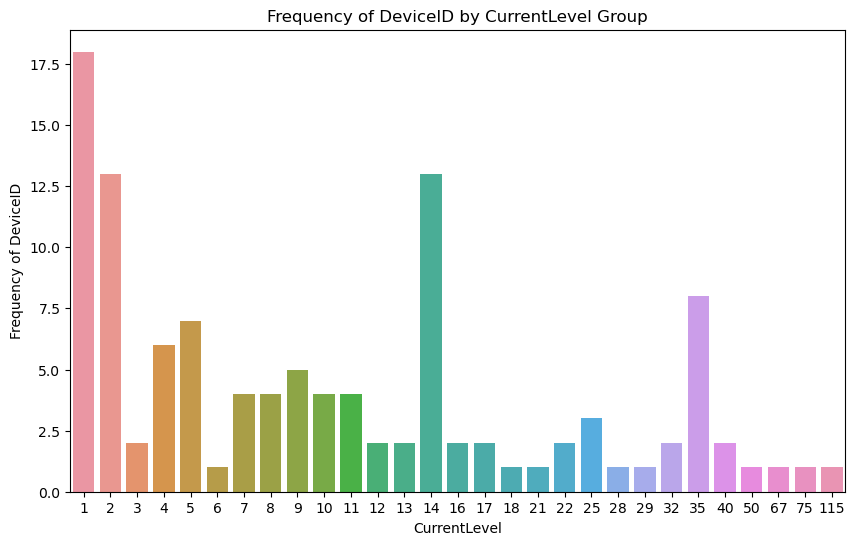

In [38]:
# 方法：用Seaborn绘制


# 步骤1：对每个 CurrentLevel 组内的 DeviceID 进行计数
device_counts = df_filtered.groupby('CurrentLevel')['DeviceID'].count().reset_index(name='DeviceCount')

# 步骤2：使用 unstack 转换数据格式（可选，取决于绘图需求）
# 如果你想要每个 DeviceID 占据一个子图的柱状图，可以使用 unstack。
# device_counts = device_counts.pivot_table(index='CurrentLevel', columns='DeviceID', values='DeviceCount', fill_value=0)

# 步骤3：使用 Seaborn 的 barplot 绘制频率图
plt.figure(figsize=(10, 6))
sns.barplot(x='CurrentLevel', y='DeviceCount', data=device_counts)

plt.title('Frequency of DeviceID by CurrentLevel Group')
plt.xlabel('CurrentLevel')
plt.ylabel('Frequency of DeviceID')
plt.savefig('image_filename.png')  # 将 'png' 替换为其他格式如 'jpeg',
# 显示图表
plt.show()
